<div style="text-align: center;">
    <span style="color: red; font-size: 70px;"> Bosoni ideali</span>
</div>

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.cm import ScalarMappable

from scipy.stats import norm

I sistemi a cui siamo interessati sono sistemi ad $N$ particelle non interagenti, ai quali possiamo estendere il formalismo tipico degli stati one-body. La matrice densità può essere allora valutata come

$$
\rho\left(\left\{x_1,\,\dots\,,\,x_N\right\},\,\left\{x'_1,\,\dots\,,\,x'_N\right\}\,,\,\beta\right)\,=\,\sum_{ortho}\psi_n\left(x_1,\,\dots\,,\,x_N\right)\exp{\left(-\beta E_n\right)}\psi^*_n\left(x'_1,\,\dots\,,\,x'_N\right),
$$

dove stiamo lavorando con gli autostati dell'hamiltoniana. Nel caso di un sistema bosonico è tuttavia necessario lavorare con funzioni d'onda totalmente simmetriche, che comporta la necessità di campionare permutazioni fra le varie particelle in analisi. La matrice densità di un tale sistema composto da particelle indistinguibili può essere riscritta come somma di matrici densità di sistemi N-body dotati di distinguibilità.

$$
\rho^{sym}\left(\left\{x_1,\,\dots\,,\,x_N\right\},\,\left\{x'_1,\,\dots\,,\,x'_N\right\},\,\beta\right)\,=\,\sum_{ortho,\,sym}\psi_n^{sym}\left(x_1,\,\dots\,,\,x_N\right)\exp{\left(-\beta E_n\right)}\psi_n^{*\,sym}\left(x'_1,\,\dots\,,\,x'_N\right)
$$

$$
=\,\frac{1}{N!}\sum_P \rho^{dist}\left(\left\{x_1,\,\dots\,,\,x_N\right\},\,\left\{x'_{P_1},\,\dots\,,\,x'_{P_N}\right\},\,\beta\right)\,=\,\frac{1}{N!}\sum_P \prod_k \rho\left(x_k,\,x'_{P_k},\,\beta\right)
$$


<center>

## Studio delle permutazioni

</center>


Il ruolo fondamentale ricoperto dalle permutazioni rende necessario lo sviluppo di un metodo computazionale per valutare "funzioni di partizione" di permutazioni, ciascuna delle quali presenta un peso arbitrario. In quest'ottica viene in aiuto il concetto di _last element cycle_, ossia il ciclo che contiene l'ultimo elemento $N$ del set sul quale andiamo ad attuare le permutazioni. Il _last element cycle_ in generale presenta $k$ elementi e ha un peso $z_k$; gli altri $N\,-\,k$ elementi non sono vincolati e la funzione di partizione è $Y_N$. La funzione di partizione totale dipenderà quindi dal:

- numero di scelte possibili di k

- numero di differenti set possibili a k fissato
- numero di cicli daro un set
- funzione di partizione degli esclusi

Questo approccio consente di ricavare una formula ricorsiva per il calcolo di $Y_N$, che risulterà univocamente determinata una volta ricavato il set $\left\{Z_0,\,\dots,\,Z_{N-1}\right\}$:

$$
Y_N\,=\,\sum_{k\,=\,1}^N\frac{1}{N}z_k\frac{N!}{\left(N\,-\,k\right)!}Y_{N-k}
$$


<center>

## Osservabili bosonici

</center>


La funzione di partizione per un sistema bosonico ideale può essere espressa come una somma di prodotti di funzioni di partizione a singola particella, che verrano indicate come

$$
z\left(\beta\right)\,=\,\int dx \rho\left(x,\,x,\,\beta\right)\,=\,\sum_\sigma\exp{\left(-\beta E_\sigma\right)}
$$

Lavorando con la formula ricorsiva ricavata in precedenza, otteniamo che è possibile lavorare in modo ricorsivo per ricavare la funzione di partizione del sistema ad N bosoni ideali. In particolare è possibile ricavare che:

$$
Z_N\,=\,\frac{1}{N}\sum_{k\,=\,1}^{N-1} z_k Z_{N-k},
$$

$$
\left<E\right>\,=\,-\frac{1}{NZ_N}\sum_{k\,=\,1}^{N}\left(\frac{\partial z_k}{\partial \beta}Z_{N-k}\,+\,z_k\frac{\partial Z_{N-k}}{\partial \beta}\right),
$$

$$
\left<N_0\right>\,=\,\frac{Z_{N-1}\,+\,Z_{N-2}\,+\,\dots\,+\,Z_1\,+\,Z_0}{Z_N},
$$

dove $z_k\,=\,z\left(k\beta\right)$.


<center>

## Direct samlping per bosoni

</center>


Una configurazione bosonica consiste in una permutazione ed un set di posizioni: tali ingredienti possono essere determinati con una procedura a due step.

1. Ricordandoci che la funzione di partizione di N bosoni è data dalla somma di funzioni di partizione con _last element cycles_ di lunghezza arbitraria, per campionare la permutazione basta valutare uniformemente la lunghezza dello stesso fra 1 ed N. Una volta fatto questo, si campiona il ciclo successivo sulle $N\,-\,k$ particelle rimanenti. Data l'indistiguibilità delle particelle considerate, basta tenere in memoria la lunghezza dei cicli generati.

2. Per campionare le coordinate sfruttiamo il fatto che le particelle che appartengono ad ogni ciclo di una data lunghezza formano un percors chiuso che può essere valutato andando a lavorare a temperatura inversa $k\beta$ e con passo discreto nel tempo immaginario dato da $\Delta_\tau\,=\,\beta$.

<div style="text-align: center;">
    <span style="color: blue; font-size: 40px;"> Canonical recursion</span>
</div>

In seguito lavoriamo nell'ensamble canonico per un sistema di $N\,=\,200$ bosoni posti in una trappola armonica tridimensionale.

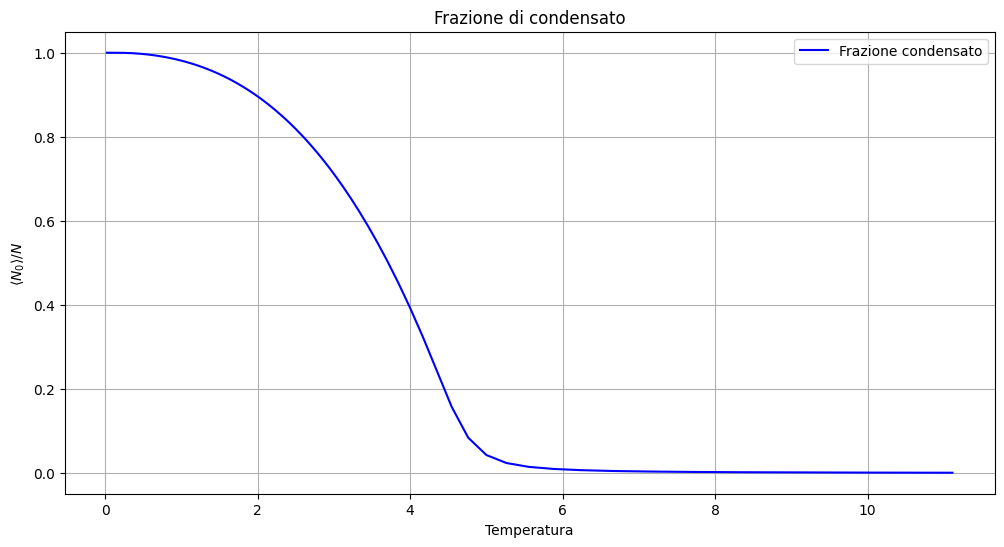

In [7]:
plt.figure(figsize=(12,6))

appo = np.loadtxt('canonicRecursion/osservabili.dat')
plt.plot(1/appo[:, 0], appo[:, 2], color = 'blue', label = 'Frazione condensato')

plt.xlabel("Temperatura")
plt.ylabel(r"$\left<N_0\right>/N$")
plt.title("Frazione di condensato")

plt.grid(True)
plt.legend()
plt.show()

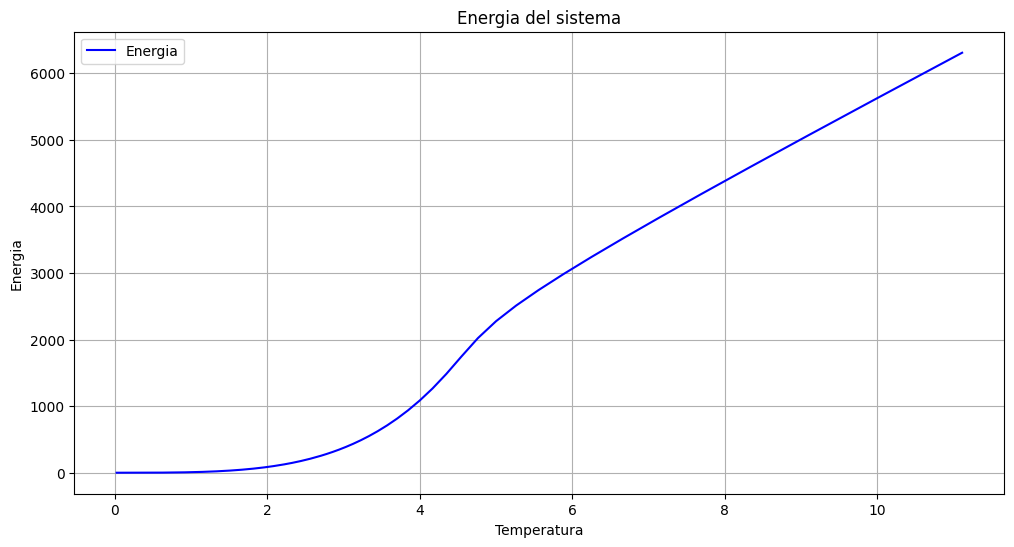

In [8]:
plt.figure(figsize=(12,6))

appo = np.loadtxt('canonicRecursion/osservabili.dat')
plt.plot(1/appo[:, 0], appo[:, 1], color = 'blue', label = 'Energia')

plt.xlabel("Temperatura")
plt.ylabel(r"Energia")
plt.title("Energia del sistema")

plt.grid(True)
plt.legend()
plt.show()

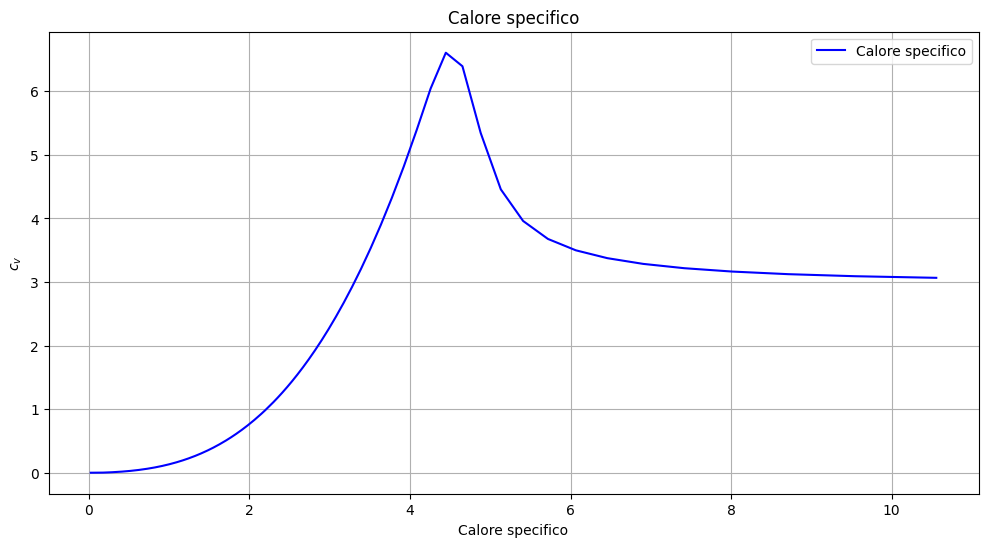

In [12]:
plt.figure(figsize=(12,6))

appo = np.loadtxt('canonicRecursion/osservabili.dat')
temp = 1/appo[:, 0]
energy = appo[:, 1]

cv = np.zeros(len(temp)-1)
tcv = np.zeros(len(temp)-1)
for i in range(1, len(temp)):
    dt = temp[i] - temp[i-1]
    cv[i-1] = (energy[i] - energy[i-1])/(200 * dt)
    tcv[i-1] = (temp[i] + temp[i-1])/2

plt.plot(tcv, cv, color = 'blue', label = 'Calore specifico')

plt.xlabel("Calore specifico")
plt.ylabel(r"$c_v$")
plt.title("Calore specifico")

plt.grid(True)
plt.legend()
plt.show()